In [12]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try :
    if platform.system() == 'windows':
        # windows의 경우
        font_name = font_manager.FomntProperties(fname="c:/Windows/Font")
        rc('font', family = font_name)
    else:
        # mac의 경우
        rc('font', family = 'AppleGothic')
except :
    pass

matplotlib.rcParams['axes.unicode_minus'] = False

In [1]:
import cv2
import skimage.data

img_astro = skimage.data.astronaut()
img = cv2.cvtColor(img_astro, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape[:2]

# 이미지의 중심점을 기준으로 90도 회전. 크기는 70%
H = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.7)

# 50만큼 평행이동
H[:, 2] += 50

H

array([[  0.60621778,   0.35      ,  61.20824764],
       [ -0.35      ,   0.60621778, 240.40824764]])

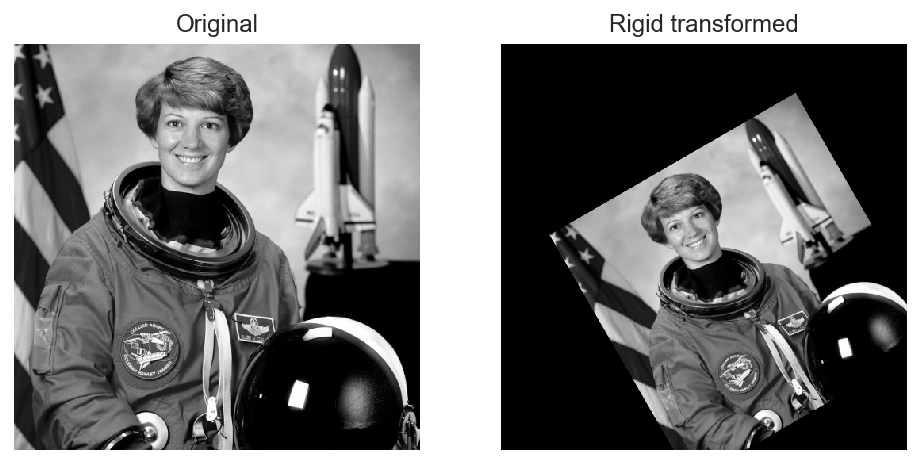

In [3]:
dst = cv2.warpAffine(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 8))
ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(img, cmap=plt.cm.gray)
ax2.set_title("Rigid transformed")
ax2.axis("off")
ax2.imshow(dst, cmap=plt.cm.gray)
plt.show()

###### 3점 어파인 변환
    어파인 변환에 사용되는 행렬을 지정하는데는 3점이 어떻게 변환되는지만 알면 된다. OpenCV에는 주어진 두 쌍의 3점으로부터 어파인 변환을 위한 사영행렬을 계산하는 getAffineMatrix 함수를 제공

In [5]:
import scipy as sp

img = sp.misc.face()
rows, cols, ch = img.shape

pts1 = np.float32([[200, 200], [200, 600], [800, 200]])
pts2 = np.float32([[100, 100], [200, 500], [600, 100]])

pts_x1, pts_y1 = zip(*pts1)
pts_x2, pts_y2 = zip(*pts2)

H_affine = cv2.getAffineTransform(pts1, pts2)
H_affine

array([[ 8.33333333e-01,  2.50000000e-01, -1.16666667e+02],
       [-1.77635684e-17,  1.00000000e+00, -1.00000000e+02]])

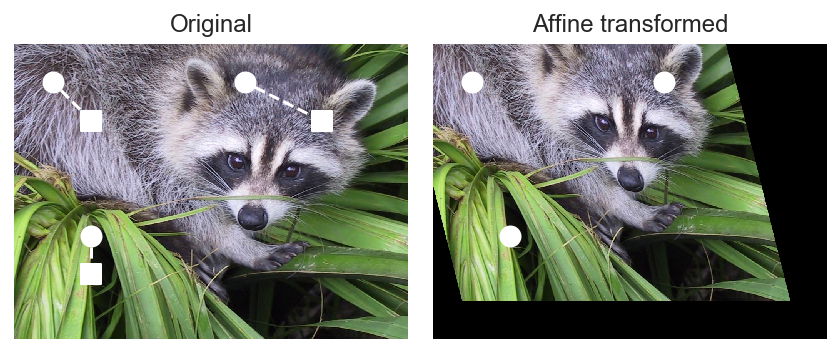

In [6]:
img2 = cv2.warpAffine(img, H_affine, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2)

ax1.set_title("Original")
ax1.imshow(img)
ax1.scatter(pts_x1, pts_y1, c='w', s=100, marker="s")
ax1.scatter(pts_x2, pts_y2, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x1, pts_x2), axis=-1))),
         list(zip(*np.stack((pts_y1, pts_y2), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Affine transformed")
ax2.imshow(img2)
ax2.scatter(pts_x2, pts_y2, c='w', s=100)
ax2.axis("off")

plt.tight_layout()
plt.show()

###### 원근변환
    원근변환(perspective transform)은 핀홀 카메라(pin-hole camera) 모형을 사용하여 2차원 이미지를 변환하는 방법이다. 원근법 변환은 직선의 성질만 유지가 되고, 선의 평행성은 유지가 되지 않는 변환

In [7]:
pts1 = np.float32([[200, 200], [200, 600], [800, 200], [800, 600]])
pts2 = np.float32([[300, 300], [300, 500], [600, 100], [700, 500]])

H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[-8.43769499e-17, -7.62711864e-02,  2.59322034e+02],
       [-3.38983051e-01,  2.79661017e-01,  2.55932203e+02],
       [-6.77966102e-04, -2.54237288e-04,  1.00000000e+00]])

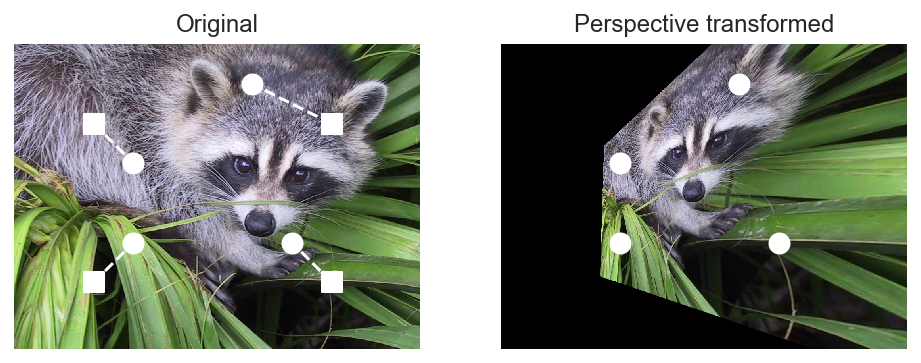

In [9]:
img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 8))

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()

###### 연습 문제
    다음 왼쪽 이미지를 원근변환하여 오른쪽 이미지와 같이 펼쳐라. 이미지는 다음 명령으로 내려받는다.

In [10]:
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png

--2020-08-11 12:09:57--  https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png
Resolving datascienceschool.net (datascienceschool.net)... 114.202.2.86
Connecting to datascienceschool.net (datascienceschool.net)|114.202.2.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2731251 (2.6M) [image/png]
Saving to: ‘receipt.png’

receipt.png         100%[===================>]   2.60M  5.10MB/s    in 0.5s    

2020-08-11 12:09:57 (5.10 MB/s) - ‘receipt.png’ saved [2731251/2731251]



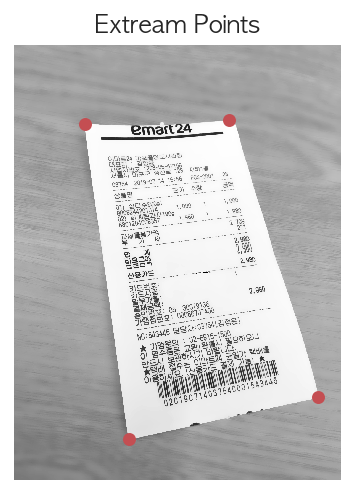

In [20]:
import cv2

img = cv2.imread('./receipt.png') # 데이터 로드
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이톤으로 변환

img = cv2.bilateralFilter(img, 30, 30, 30)
_, thresh1 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY) # thresh 설정

thresh1 = cv2.medianBlur(thresh1, 11) # 중앙값 블러

img_result = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
)


contours, hierachy = cv2.findContours(img_result, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
c0 = contours[0]


leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.axis(False)
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="r", s=30)
plt.title("Extream Points")

plt.show()

In [22]:
pts1 = np.float32([leftmost, rightmost, topmost, bottommost])
pts2 = np.float32([[0, 0], [1184, 1578], [1184, 0], [0, 1578]])

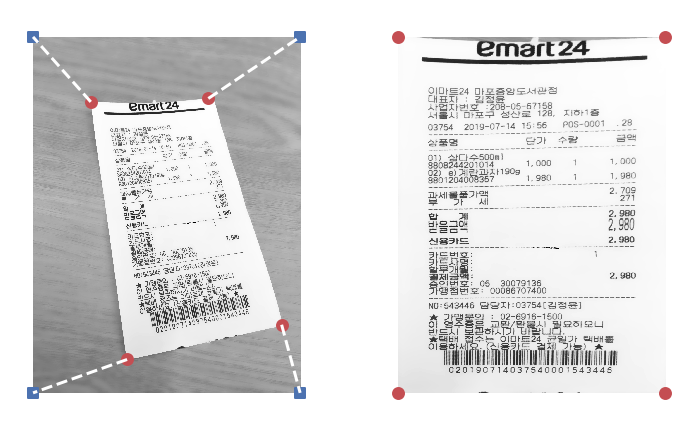

In [23]:
pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

rows, cols = img.shape[:2]
H = cv2.getPerspectiveTransform(pts1, pts2)
img2 = cv2.warpPerspective(img, H, (cols, rows))

plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.scatter(pts1[:, 0], pts1[:, 1], c="r", marker="o", s=30)
plt.scatter(pts2[:, 0], pts2[:, 1], c="b", marker="s", s=30)
plt.plot(list(zip(*np.stack((pts1[:, 0], pts2[:, 0]), axis=-1))),
         list(zip(*np.stack((pts1[:, 1], pts2[:, 1]), axis=-1))), "--", c="w")
plt.axis("off")
plt.subplot(122)
plt.imshow(img2, cmap=plt.cm.gray)
plt.scatter(pts2[:, 0], pts2[:, 1], c="r", marker="o", s=30)
plt.axis("off")
plt.show()